In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [254]:
df = pd.read_csv("ifood_df.csv")

In [256]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [7]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

- We can see there are missing elements

In [258]:
df = df.drop(['Z_CostContact','Z_Revenue','MntRegularProds'], axis=1)

In [260]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,0,0,1,0,0,1529,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,0,0,1,0,0,21,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,0,1,0,0,734,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,0,1,0,0,48,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,1,407,0


<Axes: ylabel='Frequency'>

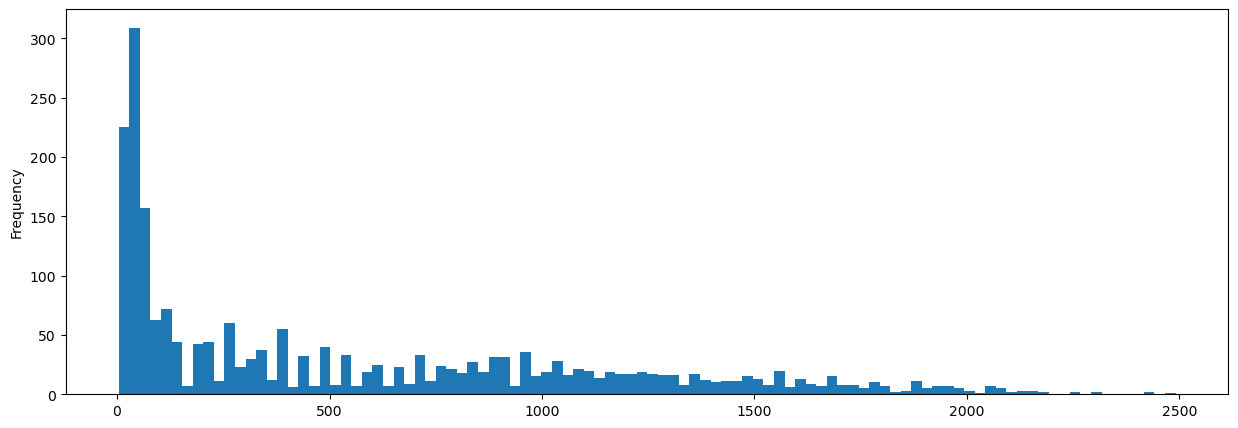

In [262]:
df['MntTotal'].plot(kind='hist', bins=100,figsize=(15, 5))

- We can see most of the MntTotal is from 0 to 2200
- Rest of them can be considered as outliers

In [36]:
df['MntTotal'].max()

2491

In [264]:
df = df.query('MntTotal < 2200').copy()

In [266]:
df['MntTotal'].max()

2188

# Outlier Detection And Remove

In [46]:
num_cols = ['Income', 'Age', 'Recency', 'AcceptedCmpOverall']

In [268]:
df.shape

(2198, 36)

# Correlation with MntTotal

In [270]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

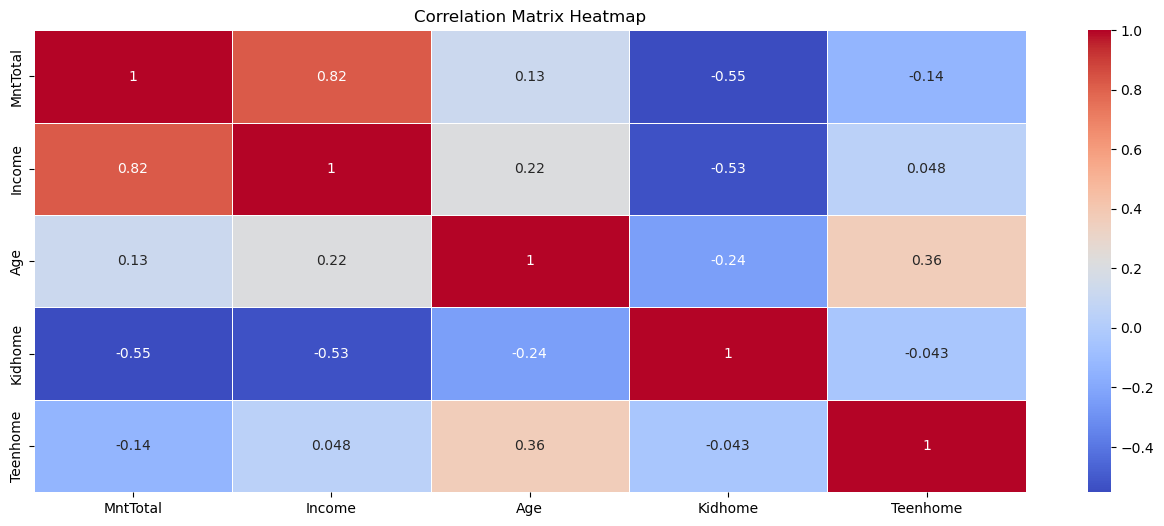

In [272]:
corr_matrix = df[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- Here we can see MntTotal has lowest relation with Kidhome and Teenhome
- Means they are not that much correlated and have fewer similarities

# Feature Engineering

In [274]:

df["TotalSpend"] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df["TotalPurchases"] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df["AOV"] = df["MntTotal"] / df["TotalPurchases"]

df["AOV"] = df["AOV"].replace([np.inf, -np.inf], np.nan)
df["AOV"] = df["AOV"].fillna(df["AOV"].median())


print(df[['Income', 'Age', 'Recency', 'TotalSpend', 'TotalPurchases', 'AOV']].describe())


              Income          Age      Recency   TotalSpend  TotalPurchases  \
count    2198.000000  2198.000000  2198.000000  2198.000000     2198.000000   
mean    51514.509099    51.110100    49.033212   600.928571       12.537307   
std     20652.288993    11.687389    28.949193   593.468304        7.165526   
min      1730.000000    24.000000     0.000000     5.000000        0.000000   
25%     35178.000000    43.000000    24.000000    69.000000        6.000000   
50%     51171.500000    50.000000    49.000000   396.000000       12.000000   
75%     68118.000000    61.000000    74.000000  1039.750000       18.000000   
max    113734.000000    80.000000    99.000000  2346.000000       32.000000   

               AOV  
count  2198.000000  
mean     33.982246  
std      28.669926  
min       1.520000  
25%      10.250000  
50%      26.320513  
75%      43.875000  
max     176.000000  


In [276]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,AcceptedCmpOverall,TotalSpend,TotalPurchases,AOV
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,0,1617,22,69.500000
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,0,27,4,5.250000
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,0,776,20,36.700000
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,0,53,6,8.000000
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,0,422,14,29.071429


# Normalization

In [278]:
sc= StandardScaler()

In [280]:
column_names= df.columns.values
df_sc= sc.fit_transform(df)
df_2= pd.DataFrame(df_sc, columns=column_names)

In [282]:
df_2

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,AcceptedCmpOverall,TotalSpend,TotalPurchases,AOV
0,0.320788,-0.825607,-0.933536,0.309813,0.994086,1.561871,1.778527,2.463836,1.498694,0.855369,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,1.711858,-0.437746,1.712480,1.320887,1.239132
1,-0.250417,1.035608,0.903449,-0.381210,-0.875428,-0.636870,-0.731221,-0.649959,-0.633698,-0.733733,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,-0.944170,-0.437746,-0.967295,-1.191713,-1.002402
2,0.973406,-0.825607,-0.933536,-0.795824,0.367918,0.576229,-0.168852,1.346533,-0.143493,-0.036078,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,0.311631,-0.437746,0.295064,1.041709,0.094816
3,-1.204427,1.035608,-0.933536,-0.795824,-0.875428,-0.561051,-0.666154,-0.503427,-0.584678,-0.753112,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,-0.896615,-0.437746,-0.923475,-0.912535,-0.906461
4,0.328295,1.035608,-0.933536,1.553654,-0.390074,0.424591,-0.210681,0.155965,0.003568,-0.559319,...,-0.314643,-0.158703,-1.01006,-0.443301,1.904565,-0.264312,-0.437746,-0.301565,0.204176,-0.171327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,0.470200,-0.825607,0.903449,-0.104801,1.215791,0.424591,0.086771,0.082699,2.234002,3.936676,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,0.945696,-0.437746,1.247311,0.483353,1.199884
2194,0.605373,2.896822,0.903449,0.240710,0.307998,-0.662143,-0.619677,-0.686592,-0.658209,-0.694974,...,-0.314643,-0.158703,-1.01006,-0.443301,1.904565,-0.213234,1.047077,-0.264486,0.343765,-0.171493
2195,0.264752,-0.825607,-0.933536,1.450000,1.811998,0.550956,0.249440,-0.100465,-0.364086,-0.384905,...,-0.314643,-0.158703,0.99004,-0.443301,-0.525054,1.162335,1.047077,1.078772,0.762531,1.173233
2196,0.858720,-0.825607,0.903449,-1.417744,0.373910,0.096044,0.235497,0.778724,0.077099,0.332128,...,-0.314643,-0.158703,-1.01006,2.255802,-0.525054,0.396173,-0.437746,0.407986,1.181298,0.113589


In [103]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
education_2n Cycle        int64
education_Basic           int64
educatio

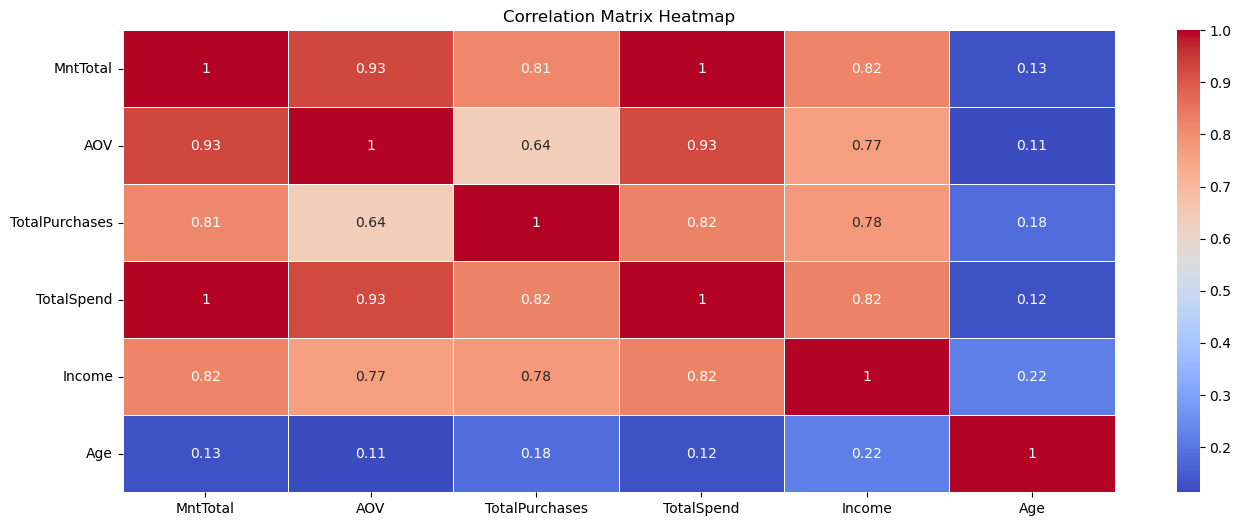

In [284]:
corr_matrix = df_2[['MntTotal'] + ['AOV'] + ['TotalPurchases'] + ['TotalSpend'] + ['Income'] + ['Age']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

- We can see that AOV, TotalPurchases, TotalSpend, Income has most correlation with MintToal
- so for K means, we will consider these columns

# Elbow Method

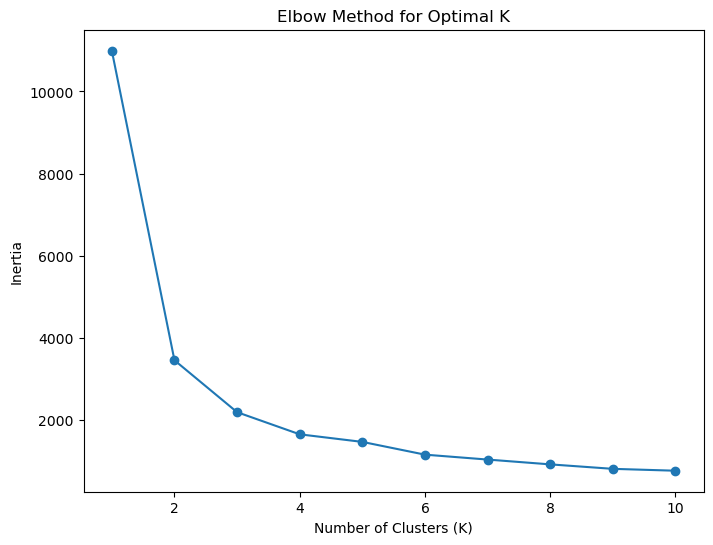

In [407]:
inertia = []
K_range = range(1, 11)  # Check for k = 1 to 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_2[['MntTotal', 'Income', 'TotalPurchases', 'TotalSpend', 'AOV']])  # Selecting the features of interest
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

- Here we can see that the value of k is 4

# Clustering Process

Cluster Centers:
   MntTotal    Income  TotalPurchases  TotalSpend       AOV
0 -0.880675 -0.949912       -1.026889   -0.894569 -0.830125
1  1.879180  1.299883        0.971679    1.854439  1.839391
2  0.687471  0.823329        1.031265    0.704806  0.545090
3 -0.344761 -0.014668        0.091397   -0.323901 -0.249435


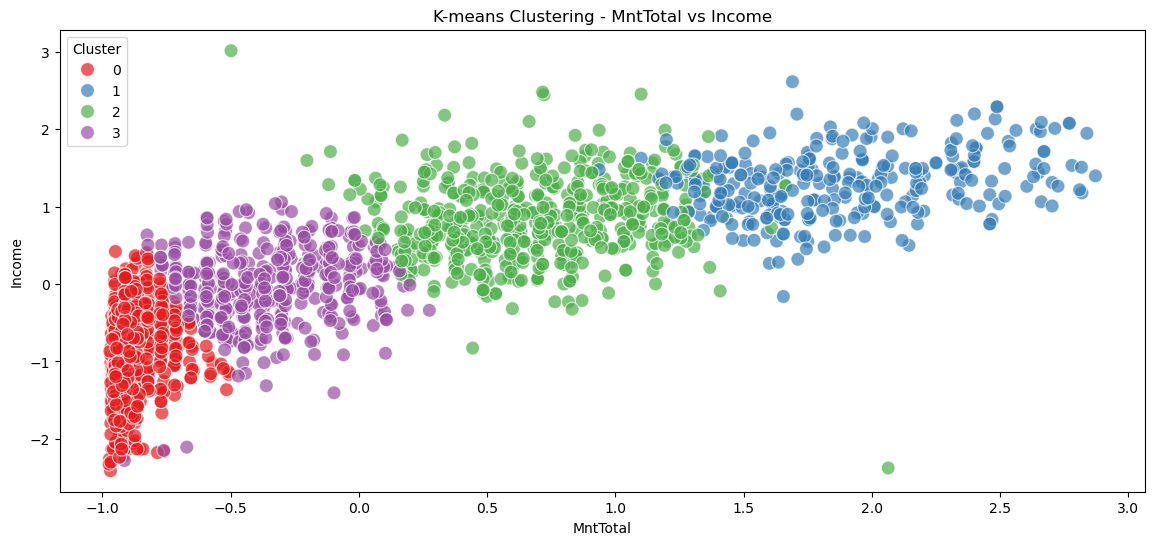

In [409]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_2['Cluster'] = kmeans.fit_predict(df_2[['MntTotal', 'Income', 'TotalPurchases', 'TotalSpend', 'AOV']])

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['MntTotal', 'Income', 'TotalPurchases', 'TotalSpend', 'AOV'])
print("Cluster Centers:")
print(centroids)

plt.figure(figsize=(14,6))
sns.scatterplot(data=df_2, x='MntTotal', y='Income', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('K-means Clustering - MntTotal vs Income')
plt.xlabel('MntTotal')
plt.ylabel('Income')
plt.show()

In [411]:
df['Cluster'] = df_2['Cluster']
df['CustomerNumber'] = df.index
cols = ['CustomerNumber'] + [col for col in df_2.columns if col != 'CustomerNumber']
df = df[cols]
df.head()

,CustomerNumber,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,AcceptedCmpOverall,TotalSpend,TotalPurchases,AOV,Cluster
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,1,0,0,1529,0,1617,22,69.500000,1.0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,1,0,0,21,0,27,4,5.250000,0.0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,734,0,776,20,36.700000,2.0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,48,0,53,6,8.000000,0.0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,407,0,422,14,29.071429,3.0


In [323]:
df.groupby("Cluster")['CustomerNumber'].count().sort_values(ascending=False)

Cluster
1.0    871
0.0    550
3.0    482
2.0    288
Name: CustomerNumber, dtype: int64

- So we can see that most of the customers are divided in cluster number 0
- and cluster number 2 have least number of customers

In [294]:
df.columns.values

array(['CustomerNumber', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response', 'Age', 'Customer_Days', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD',
       'MntTotal', 'AcceptedCmpOverall', 'TotalSpend', 'TotalPurchases',
       'AOV', 'Cluster'], dtype=object)

In [413]:
cols_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds']

mnt_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()


,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.0,179.571757,15.582090,95.735936,23.693456,15.482204,29.876005
1,1.0,529.363636,44.181818,324.454545,62.249158,46.077441,59.016835
2,2.0,399.012868,35.435662,210.702206,49.775735,36.829044,58.189338
3,3.0,278.066806,23.983299,133.427975,33.453027,24.329854,43.486430


C:\Users\HP\AppData\Local\Temp\ipykernel_2424\1929638.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


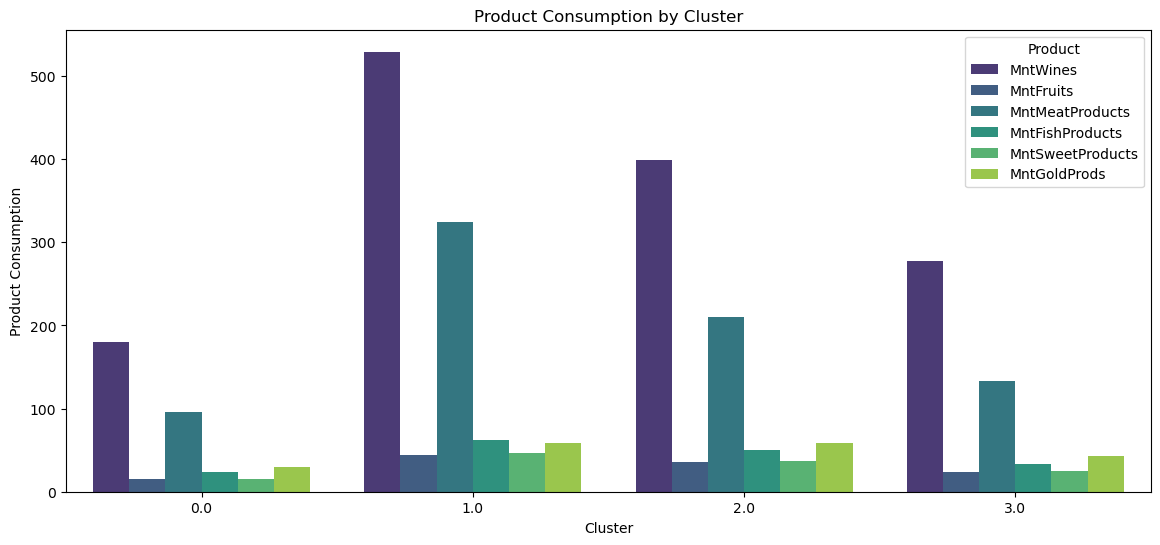

In [415]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(14, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()


- Cluster number 2 has the highest product consumption
- Cluster number 0 has almost non existent product consumption

C:\Users\HP\AppData\Local\Temp\ipykernel_2424\2041776305.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="MntTotal", data=a, ci=None, palette="viridis", width = 0.3)
C:\Users\HP\AppData\Local\Temp\ipykernel_2424\2041776305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="MntTotal", data=a, ci=None, palette="viridis", width = 0.3)


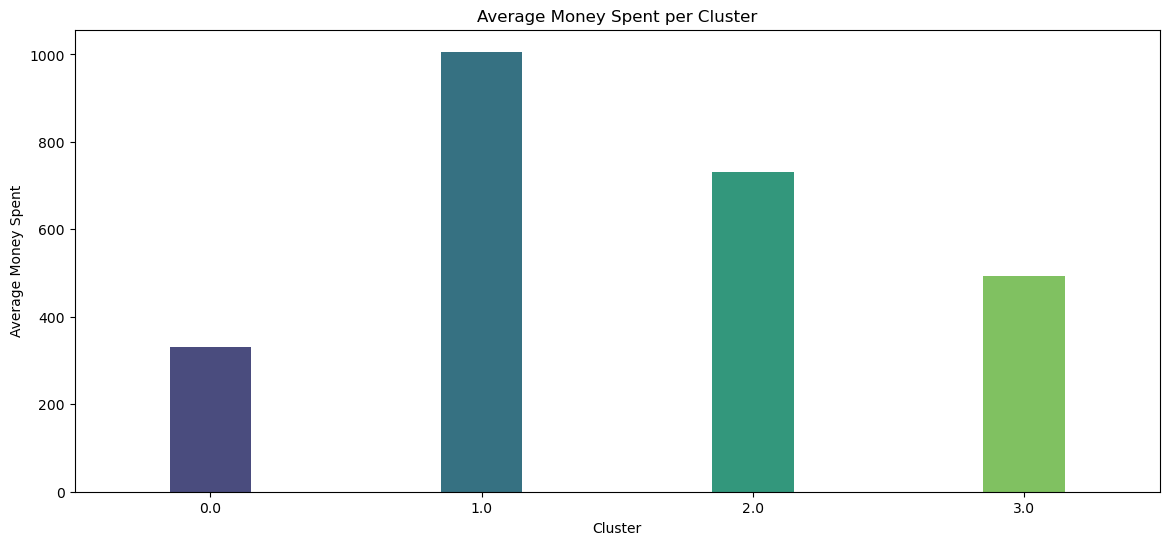

In [417]:
a = df.groupby('Cluster')['MntTotal'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x="Cluster", y="MntTotal", data=a, ci=None, palette="viridis", width = 0.3)
plt.title("Average Money Spent per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Money Spent")
plt.xticks(rotation=0)  

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_2424\3509407843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


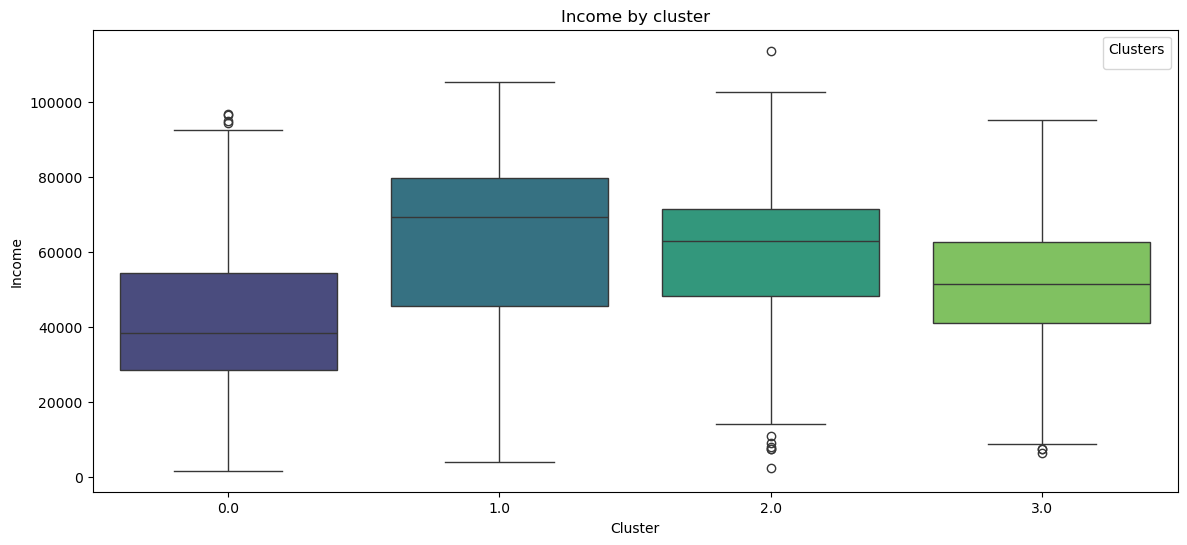

In [419]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

- We can see that the income of cluster number 0 is the lowest
- Whereas cluster number 1 has the highest income

In [305]:
df.columns.values

array(['CustomerNumber', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response', 'Age', 'Customer_Days', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD',
       'MntTotal', 'AcceptedCmpOverall', 'TotalSpend', 'TotalPurchases',
       'AOV', 'Cluster'], dtype=object)

In [421]:
filtered_df = df[(df['education_Basic'] == 1) | 
                 (df['education_Graduation'] == 1) | 
                 (df['education_Master'] == 1) | 
                 (df['education_PhD'] == 1)]

In [423]:
education_counts_melted = education_counts.melt(id_vars="Cluster", 
                                                value_vars=['education_Basic', 'education_Graduation', 
                                                            'education_Master', 'education_PhD'],
                                                var_name='Education Level', 
                                                value_name='Count')


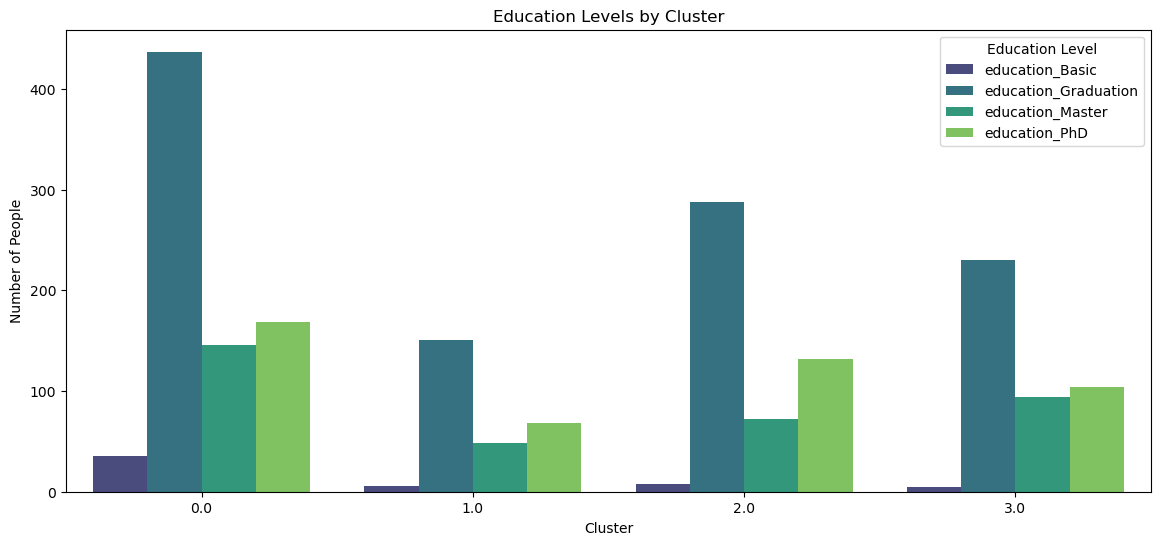

In [425]:
plt.figure(figsize=(14, 6))

sns.barplot(x="Cluster", y="Count", hue="Education Level", data=education_counts_melted, palette="viridis")

plt.title("Education Levels by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of People")
plt.xticks(rotation=0)

plt.legend(title="Education Level")
plt.show()

# Cluster Analysis and Insights
### Cluster 1

- This cluster is the highest spending cluster
- Premium Product Focus: Market exclusive, high-end products (e.g., gourmet food, luxury meats, fine sweets, or gold products). These customers will 
  respond well to high-quality, exclusive offerings
- Loyalty & VIP Programs: Design a loyalty program to reward their spending habits, offering personalized experiences
- Personalized Marketing: Use data to send tailored promotions based on their previous spending

### Cluster 2

- Customers in this cluster spend moderately across categories
- Value Bundles: Create product bundles that offer a mix of popular items at a reasonable price. For example, a "family pack" combining meat, food, and 
  fish at a discounted rate
- Seasonal Promotions: Since they are more price-sensitive, run targeted sales during key holidays or shopping seasons
- Incentivize Frequency: Encourage repeat purchases by offering loyalty points, rewards, or discounts on the next purchase

### Cluster 3

- These customers consume a large quantity of products but tend to spend less on any individual product
- Budget-Friendly Product Ranges: Offer them value packs, discounts, or products that provide greater quantity for a lower price
- Subscription Models: Encourage them to sign up for subscription services (e.g., monthly deliveries of staple products at a discounted rate)

### Cluster 0

- This group has the lowest spending across all product categories and also has lower income levels
- Focus on essential products and offer deep discounts or bundle deals to incentivize purchases
- Offer smaller-sized or budget-friendly versions of more expensive products, especially in categories like meat and fish
- Introduce them to basic or entry-level versions of premium products 

In [427]:
# Assuming 'customer_id' is the unique identifier for customers
for cluster in sorted(df['Cluster'].unique()):
    customer_numbers = df[df['Cluster'] == cluster]['CustomerNumber'].tolist()
    print(f"Cluster {cluster}: {', '.join(map(str, customer_numbers))}")


Cluster 0.0: 1, 3, 7, 8, 9, 10, 13, 15, 18, 24, 26, 28, 30, 33, 35, 36, 39, 40, 41, 43, 44, 48, 53, 60, 61, 68, 69, 72, 74, 75, 76, 79, 80, 84, 85, 86, 88, 91, 92, 96, 99, 106, 109, 110, 112, 113, 114, 118, 125, 126, 127, 128, 135, 136, 137, 138, 142, 146, 149, 151, 153, 157, 158, 159, 160, 161, 162, 165, 166, 169, 171, 172, 173, 174, 177, 178, 180, 182, 191, 192, 193, 195, 203, 207, 210, 212, 216, 219, 220, 222, 223, 225, 228, 231, 236, 237, 239, 241, 244, 245, 246, 249, 251, 253, 255, 257, 259, 260, 266, 270, 271, 276, 277, 279, 280, 282, 283, 286, 288, 290, 292, 296, 297, 300, 301, 303, 305, 306, 310, 311, 312, 313, 314, 315, 317, 318, 321, 324, 327, 329, 331, 332, 338, 339, 345, 346, 350, 353, 355, 357, 358, 359, 360, 362, 363, 364, 365, 366, 367, 368, 371, 379, 380, 381, 382, 383, 385, 386, 388, 389, 391, 393, 399, 403, 404, 405, 408, 411, 417, 418, 421, 422, 423, 425, 426, 427, 428, 429, 431, 435, 445, 447, 450, 454, 456, 457, 459, 463, 464, 465, 471, 472, 479, 483, 484, 485, 487